In [1]:
import pandas as pd


In [2]:
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df = pd.read_csv('labeled_data.csv' )

In [13]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [15]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [18]:
df['label'] = df['class'].map({0:'Hate Speech',
                                1:'Offensive Lang',
                                2:'No Hate Or Offensive'
    
})

In [19]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate Or Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Lang
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Lang
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Lang
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Lang
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Lang
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate Or Offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Lang
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Lang


In [20]:
data = df[['tweet' , 'label']]

In [22]:
data.head()

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate Or Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Lang
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Lang
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Lang
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Lang


In [27]:
import re
import nltk
import string

In [28]:
from nltk.corpus import stopwords

In [29]:
stopwords = set(stopwords.words('english'))

In [30]:
stemmer = nltk.SnowballStemmer('english')

In [36]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?:S//\+|www\.s', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>*', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\n' , '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [37]:
data['tweet'] = data['tweet'].apply(clean_data)

C:\Users\Vaibhav Jadhav\AppData\Local\Temp\ipykernel_18504\3370867953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_data)


In [38]:
data

,tweet,label
0,rt mayasolov woman shouldnt complain clean ho...,No Hate Or Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Lang
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Lang
3,rt cganderson vivabas look like tranni,Offensive Lang
4,rt shenikarobert shit hear might true might f...,Offensive Lang
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Lang
24779,youv gone broke wrong heart babi drove redneck...,No Hate Or Offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Lang
24781,youu got wild bitch tellin lie,Offensive Lang


In [39]:
x = np.array(data['tweet'])
y = np.array(data['label'])

In [40]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [45]:
cv = CountVectorizer()

In [46]:
x = cv.fit_transform(x)

In [47]:
x

<24783x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 198289 stored elements in Compressed Sparse Row format>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [49]:
X_train

<16604x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 132894 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
pred = dt.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

In [56]:
cn = confusion_matrix(y_test, pred)

In [57]:
cn

array([[ 154,   35,  276],
       [  31, 1092,  256],
       [ 247,  230, 5858]], dtype=int64)

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

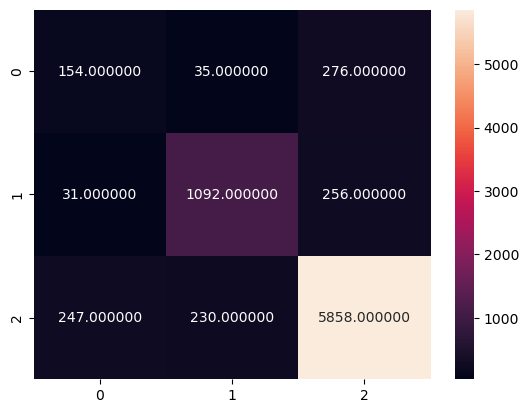

In [62]:
sns.heatmap(cn , annot=True , fmt = 'f' )

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8685658393446631

In [64]:
sample = "Let's unite and kill all the pepole who are protesting against the goverment"
sample = clean_data(sample)

In [65]:
sample

'let unit kill pepol protest gover'

In [66]:
data_check = cv.transform([sample]).toarray()

In [67]:
data_check

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
dt.predict(data_check)

array(['Hate Speech'], dtype=object)